In [8]:
import pandas as pd
import matplotlib.pyplot as pt
import numpy as np

In [9]:
data = pd.read_csv(r"D:\\FCIS\\Spring 2022\\DM\\Project\\Dataset of Diabetes .csv")
data = data.drop("ID", axis=1)
data.head()

,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,17975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,34221,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,47975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,87656,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,34223,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N


In [10]:
data.describe()

,No_Pation,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI
count,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.705514e+05,53.528000,5.124743,68.943000,8.281160,4.862820,2.349610,1.204750,2.609790,1.854700,29.578020
std,3.380758e+06,8.799241,2.935165,59.984747,2.534003,1.301738,1.401176,0.660414,1.115102,3.663599,4.962388
min,1.230000e+02,20.000000,0.500000,6.000000,0.900000,0.000000,0.300000,0.200000,0.300000,0.100000,19.000000
25%,2.406375e+04,51.000000,3.700000,48.000000,6.500000,4.000000,1.500000,0.900000,1.800000,0.700000,26.000000
50%,3.439550e+04,55.000000,4.600000,60.000000,8.000000,4.800000,2.000000,1.100000,2.500000,0.900000,30.000000
75%,4.538425e+04,59.000000,5.700000,73.000000,10.200000,5.600000,2.900000,1.300000,3.300000,1.500000,33.000000
max,7.543566e+07,79.000000,38.900000,800.000000,16.000000,10.300000,13.800000,9.900000,9.900000,35.000000,47.750000


# Preprocessing

In [11]:
data.isnull().sum()

No_Pation    0
Gender       0
AGE          0
Urea         0
Cr           0
HbA1c        0
Chol         0
TG           0
HDL          0
LDL          0
VLDL         0
BMI          0
CLASS        0
dtype: int64

In [12]:
data.duplicated().sum()

0

In [13]:
print(data["CLASS"].unique())
print(data["Gender"].unique())

['N' 'N ' 'P' 'Y' 'Y ']
['F' 'M' 'f']


In [14]:
data.loc[data["Gender"] == 'f', "Gender"] = "F"
data.loc[data["CLASS"] == 'N ', "CLASS"] = "N"
data.loc[data["CLASS"] == 'Y ', "CLASS"] = "Y"
data.loc[data["CLASS"] == 'P', "CLASS"] = "Y"


print(data["CLASS"].unique())
print(data["Gender"].unique())

['N' 'Y']
['F' 'M']


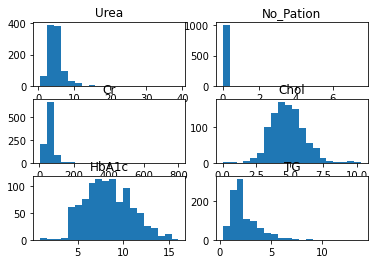

In [15]:
figure,axis = pt.subplots(3,2)
axis[0,0].hist(data["Urea"], bins = 20)
axis[0,0].set_title("Urea")
axis[0,1].hist(data["No_Pation"], bins = 20)
axis[0,1].set_title("No_Pation")
axis[1,0].hist(data["Cr"], bins = 20)
axis[1,0].set_title("Cr")
axis[2,0].hist(data["HbA1c"], bins = 20)
axis[2,0].set_title("HbA1c")
axis[1,1].hist(data["Chol"], bins = 20)
axis[1,1].set_title("Chol")
axis[2,1].hist(data["TG"], bins = 20)
axis[2,1].set_title("TG")
pt.show()

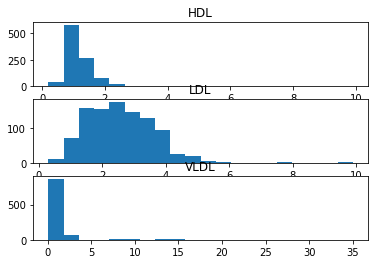

In [16]:
figure,axis = pt.subplots(3)
axis[0].hist(data["HDL"], bins = 20)
axis[0].set_title("HDL")
axis[1].hist(data["LDL"], bins = 20)
axis[1].set_title("LDL")
axis[2].hist(data["VLDL"], bins = 20)
axis[2].set_title("VLDL")
pt.show()

In [17]:
print("Skew of Urea = " + str(data["Urea"].skew()))
print("Skew of No_Pation = " + str((data["No_Pation"]).skew()))
print("Skew of Cr = " + str(data["Cr"].skew()))
print("Skew of HbA1c = " + str(data["HbA1c"].skew()))
print("Skew of Chol = " + str(data["Chol"].skew()))
print("Skew of TG = " + str(data["TG"].skew()))
print("Skew of HDL = " + str(data["HDL"].skew()))
print("Skew of LDL = " + str(data["LDL"].skew()))
print("Skew of VLDL = " + str(data["VLDL"].skew()))

Skew of Urea = 4.298927889976489
Skew of No_Pation = 19.56102868778898
Skew of Cr = 8.47415115621381
Skew of HbA1c = 0.22168940098610398
Skew of Chol = 0.6171226608860232
Skew of TG = 2.298456097830948
Skew of HDL = 6.283201244977265
Skew of LDL = 1.1459095882506958
Skew of VLDL = 5.350444676831296


In [18]:
print("Skew of Log of Urea = " + str(np.log(data["Urea"]).skew()))
print("Skew of Log of No_Pation = " + str(np.log(data["No_Pation"]).skew()))
print("Skew of Log of Cr = " + str(np.log(data["Cr"]).skew()))
print("Skew of Log of TG = " + str(np.log(data["TG"]).skew()))
print("Skew of Log of HDL = " + str(np.log(data["HDL"]).skew()))
print("Skew of Log of VLDL = " + str(np.log(data["VLDL"]).skew()))

Skew of Log of Urea = 0.49108861965625533
Skew of Log of No_Pation = 0.12884600394895263
Skew of Log of Cr = 1.381367657668296
Skew of Log of TG = 0.0380141047525895
Skew of Log of HDL = 0.970518530244944
Skew of Log of VLDL = 1.6528238713741887


In [19]:
data_normal = data.copy(deep = True)
data_deletedRows = data.copy(deep = True)
data_replaced = data.copy(deep = True)

In [20]:
def empirical_rule(df,colName, log=1, replace = False):
    if log == 1:
        name = str("log"+colName)
        df[name] = np.log(df[colName])
    elif log == 0:
        name = colName
    col_std = df[name].std()
    col_mean = df[name].mean()
    min = col_mean - 3 * col_std
    max = col_mean + 3 * col_std
    
    if replace == False:
        return df.loc[(df[name]>= min) & (df[name]<=max)]
    else:
        df.loc[ (df[name] <= min), colName] = df[colName].mean()
        df.loc[ (df[name] >= max), colName] = df[colName].mean()
        return df

In [21]:
loglist = ["Urea", "No_Pation", "Cr", "TG", "HDL", "VLDL"]
list = ["Chol","LDL", "HbA1c"]

for i in loglist + list:
    if i in loglist:
        data_deletedRows = empirical_rule(data_deletedRows,i)
        data_deletedRows = data_deletedRows.drop(data_deletedRows.iloc[:,-1].name, axis=1)

        data_replaced = empirical_rule(data_replaced,i, replace=True)
        data_replaced = data_replaced.drop(data_replaced.iloc[:,-1].name, axis=1)
    elif i in list:
        data_deletedRows = empirical_rule(data_deletedRows,i,0)
        data_replaced = empirical_rule(data_replaced,i,0, True)



In [22]:
data_replaced.describe()

,No_Pation,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI
count,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,7.221162e+04,53.528000,4.906478,62.965038,8.265822,4.811380,2.322670,1.154524,2.571559,1.249079,29.578020
std,1.437267e+05,8.799241,1.978674,23.679716,2.510616,1.135119,1.276723,0.399092,1.010914,1.271494,4.962388
min,6.320000e+02,20.000000,1.800000,20.000000,0.900000,1.200000,0.500000,0.400000,0.300000,0.100000,19.000000
25%,2.408075e+04,51.000000,3.700000,48.000000,6.500000,4.000000,1.500000,0.900000,1.800000,0.700000,26.000000
50%,3.441250e+04,55.000000,4.600000,60.000000,8.000000,4.800000,2.000000,1.100000,2.500000,0.900000,30.000000
75%,4.541025e+04,59.000000,5.600000,72.000000,10.125000,5.500000,2.900000,1.300000,3.300000,1.500000,33.000000
max,1.036556e+06,79.000000,14.900000,203.000000,15.000000,8.600000,8.700000,3.200000,5.900000,11.300000,47.750000


In [23]:
data_deletedRows.describe()

,No_Pation,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI
count,8.760000e+02,876.000000,876.000000,876.000000,876.000000,876.000000,876.000000,876.000000,876.000000,876.000000,876.000000
mean,6.177574e+04,53.663242,4.868482,62.061644,8.225868,4.822260,2.282728,1.157397,2.572374,1.201712,29.318687
std,1.283893e+05,8.678226,1.973354,22.662106,2.555613,1.133599,1.268265,0.407218,1.021819,1.264291,4.783831
min,6.320000e+02,20.000000,1.800000,20.000000,0.900000,1.200000,0.500000,0.400000,0.300000,0.200000,19.000000
25%,2.407650e+04,51.000000,3.600000,47.000000,6.400000,4.000000,1.400000,0.900000,1.800000,0.700000,26.000000
50%,3.439650e+04,55.000000,4.600000,59.000000,8.000000,4.800000,2.000000,1.100000,2.500000,0.900000,30.000000
75%,4.537225e+04,59.000000,5.670000,72.000000,10.000000,5.500000,2.900000,1.300000,3.300000,1.400000,33.000000
max,1.036556e+06,79.000000,14.500000,185.000000,15.900000,8.600000,8.500000,3.200000,5.600000,11.300000,47.750000


In [24]:
data_replaced.describe()

,No_Pation,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI
count,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,7.221162e+04,53.528000,4.906478,62.965038,8.265822,4.811380,2.322670,1.154524,2.571559,1.249079,29.578020
std,1.437267e+05,8.799241,1.978674,23.679716,2.510616,1.135119,1.276723,0.399092,1.010914,1.271494,4.962388
min,6.320000e+02,20.000000,1.800000,20.000000,0.900000,1.200000,0.500000,0.400000,0.300000,0.100000,19.000000
25%,2.408075e+04,51.000000,3.700000,48.000000,6.500000,4.000000,1.500000,0.900000,1.800000,0.700000,26.000000
50%,3.441250e+04,55.000000,4.600000,60.000000,8.000000,4.800000,2.000000,1.100000,2.500000,0.900000,30.000000
75%,4.541025e+04,59.000000,5.600000,72.000000,10.125000,5.500000,2.900000,1.300000,3.300000,1.500000,33.000000
max,1.036556e+06,79.000000,14.900000,203.000000,15.000000,8.600000,8.700000,3.200000,5.900000,11.300000,47.750000


In [25]:
from sklearn.preprocessing import LabelEncoder
labels_list = ["Gender" , "CLASS"]
LabelEncoder = LabelEncoder()
for i in labels_list:
    LabelEncoder.fit(data_normal[i])
    data_normal [i]= LabelEncoder.fit_transform(data_normal[i])
    
    LabelEncoder.fit(data_deletedRows[i])
    data_deletedRows [i]= LabelEncoder.fit_transform(data_deletedRows[i])
    
    LabelEncoder.fit(data_replaced[i])
    data_replaced [i]= LabelEncoder.fit_transform(data_replaced[i])


# labels_list2 = ["AGE" , "BMI"]

# for i in labels_list2:
#     col = pd.get_dummies(data_normal[i])
#     name = i + " "
#     for j in col.columns:
#         col.rename(columns = {j:str( name + str(j))}, inplace = True)
#     col = col.drop(col.columns[-1], axis = 1)
#     data_normal = data_normal.drop(i, axis = 1)
#     data_normal = pd.concat([data_normal, col], axis = "columns")

In [26]:
# import seaborn as sns
# corrmat = data_normal.corr()
# top_corr_features = corrmat.index
# pt.figure(figsize=(20,20))
# g=sns.heatmap(data_normal[top_corr_features].corr(),annot=True,cmap="RdYlGn")

# 3 types of data


In [27]:
X_normal = data_normal.iloc[:,0:12]
Y_normal = data_normal.iloc[:,12]

X_replaced = data_replaced.iloc[:,0:12]
Y_replaced = data_replaced.iloc[:,12]

X_deleted = data_deletedRows.iloc[:,0:12]
Y_deleted = data_deletedRows.iloc[:,12]


# Standardize 

In [28]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
Label_list3 = ["No_Pation","Urea", "Cr", "HbA1c", "Chol", "TG", "HDL", "LDL", "VLDL", "BMI" , "AGE"]

for i in Label_list3:
    arr = X_normal.loc[:, i]
    arr = arr.to_numpy().reshape(-1,1)
    col = sc.fit_transform(arr)
    X_normal[i] = col

    arr_2 = X_replaced.loc[:, i]
    arr_2 = arr_2.to_numpy().reshape(-1,1)
    col_2 = sc.fit_transform(arr_2)
    X_replaced[i] = col_2

    arr_3 = X_deleted.loc[:, i]
    arr_3 = arr_3.to_numpy().reshape(-1,1)
    col_3 = sc.fit_transform(arr_3)
    X_deleted[i] = col_3

# Sampling data by 2 methods
 ## 1) Stratified Sampling
 ## 2) Random Sampling

In [29]:
from sklearn.model_selection import train_test_split

X_normal_train, X_normal_test, Y_normal_train, Y_normal_test = train_test_split(X_normal,Y_normal,test_size = 0.35,random_state =0, stratify = Y_normal)
X_replaced_train, X_replaced_test, Y_replaced_train, Y_replaced_test = train_test_split(X_replaced,Y_replaced,test_size = 0.35,random_state =0, stratify = Y_replaced)
X_deleted_train, X_deleted_test, Y_deleted_train, Y_deleted_test = train_test_split(X_deleted,Y_deleted,test_size = 0.35,random_state =0, stratify = Y_deleted)


# X_normal_train, X_normal_test, Y_normal_train, Y_normal_test = train_test_split(X_normal,Y_normal,test_size = 0.35,random_state =0)
# X_replaced_train, X_replaced_test, Y_replaced_train, Y_replaced_test = train_test_split(X_replaced,Y_replaced,test_size = 0.35,random_state = 0)
# X_deleted_train, X_deleted_test, Y_deleted_train, Y_deleted_test = train_test_split(X_deleted,Y_deleted,test_size = 0.35,random_state =0)

# building models for normal data

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

from sklearn.naive_bayes import GaussianNB
gaussian = GaussianNB()
gaussian.fit(X_normal_train, Y_normal_train)
predict_naive = gaussian.predict(X_normal_test)
acc_naive = accuracy_score(Y_normal_test , predict_naive)*100

log = LogisticRegression(random_state=0)
log.fit(X_normal_train, Y_normal_train)
predict_log = log.predict(X_normal_test)
acc_log = accuracy_score(Y_normal_test, predict_log)*100

from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=1)
forest.fit(X_normal_train, Y_normal_train)
predict_forest = forest.predict(X_normal_test)
acc_forest = accuracy_score(Y_normal_test, predict_forest)*100

from sklearn import svm
clf = svm.SVC(kernel='linear')  # Linear Kernel
clf.fit(X_normal_train, Y_normal_train)
predict_svm = clf.predict(X_normal_test)
acc_svm = accuracy_score(Y_normal_test, predict_svm)*100

from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_normal_train, Y_normal_train)
predict_knn = neigh.predict(X_normal_test)
acc_knn = accuracy_score(Y_normal_test, predict_knn)*100

from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion='entropy', random_state=0)
tree.fit(X_normal_train, Y_normal_train)
predict_tree = tree.predict(X_normal_test)
acc_tree = accuracy_score(Y_normal_test, predict_tree)*100

from sklearn.ensemble import GradientBoostingClassifier
gbk = GradientBoostingClassifier()
gbk.fit(X_normal_train, Y_normal_train)
predict_gbk = gbk.predict(X_normal_test)
acc_g = accuracy_score(Y_normal_test , predict_gbk)*100




In [31]:
print("For normal data")
print('[1]Logistic Regression Training Accuracy :', acc_log)
print('[2]Decision Tree Classifier Training Accuracy :', acc_tree)
print('[3]KNN Classifier Training Accuracy :', acc_knn)
print('[4]SVM Training Accuracy :', acc_svm)
print('[5]Random Forest Classifier Training Accuracy :', acc_forest)
print('[6]Gradient Boosting Classifier Training Accuracy :', acc_g)
print('[7]naive bayes Training Accuracy :', acc_naive)

For normal data
[1]Logistic Regression Training Accuracy : 96.85714285714285
[2]Decision Tree Classifier Training Accuracy : 99.42857142857143
[3]KNN Classifier Training Accuracy : 96.28571428571429
[4]SVM Training Accuracy : 96.57142857142857
[5]Random Forest Classifier Training Accuracy : 99.71428571428571
[6]Gradient Boosting Classifier Training Accuracy : 99.14285714285714
[7]naive bayes Training Accuracy : 86.85714285714286


# building models for replaced data

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

log = LogisticRegression(random_state=0)
log.fit(X_replaced_train, Y_replaced_train)
predict_log = log.predict(X_replaced_test)
acc_log = accuracy_score(Y_replaced_test, predict_log)*100

from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=1)
forest.fit(X_replaced_train, Y_replaced_train)
predict_forest = forest.predict(X_replaced_test)
acc_forest = accuracy_score(Y_replaced_test, predict_forest)*100

from sklearn import svm
clf = svm.SVC(kernel='linear')  # Linear Kernel
clf.fit(X_replaced_train, Y_replaced_train)
predict_svm = clf.predict(X_replaced_test)
acc_svm = accuracy_score(Y_replaced_test, predict_svm)*100

from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_replaced_train, Y_replaced_train)
predict_knn = neigh.predict(X_replaced_test)
acc_knn = accuracy_score(Y_replaced_test, predict_knn)*100


from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion='entropy', random_state=0)
tree_fit = tree.fit(X_replaced_train, Y_replaced_train)
predict_tree = tree.predict(X_replaced_test)
acc_tree = accuracy_score(Y_replaced_test, predict_tree)*100

from sklearn.ensemble import GradientBoostingClassifier
gbk = GradientBoostingClassifier()
gbk.fit(X_replaced_train, Y_replaced_train)
predict_gbk = gbk.predict(X_replaced_test)
acc_g = accuracy_score(Y_replaced_test , predict_gbk)*100

from sklearn.naive_bayes import GaussianNB
gaussian = GaussianNB()
gaussian.fit(X_replaced_train, Y_replaced_train)
predict_naive = gaussian.predict(X_replaced_test)
acc_naive = accuracy_score(Y_replaced_test , predict_naive)*100

In [33]:
print("For replaced data")
print('[1]Logistic Regression Training Accuracy :', acc_log)
print('[2]Decision Tree Classifier Training Accuracy :', acc_tree)
print('[3]KNN Classifier Training Accuracy :', acc_knn)
print('[4]SVM Training Accuracy :', acc_svm)
print('[5]Random Forest Classifier Training Accuracy :', acc_forest)
print('[6]Gradient Boosting Classifier Training Accuracy :', acc_g)
print('[7]naive bayes Training Accuracy :', acc_naive)

For replaced data
[1]Logistic Regression Training Accuracy : 96.0
[2]Decision Tree Classifier Training Accuracy : 99.14285714285714
[3]KNN Classifier Training Accuracy : 94.28571428571428
[4]SVM Training Accuracy : 96.57142857142857
[5]Random Forest Classifier Training Accuracy : 99.71428571428571
[6]Gradient Boosting Classifier Training Accuracy : 99.14285714285714
[7]naive bayes Training Accuracy : 90.0


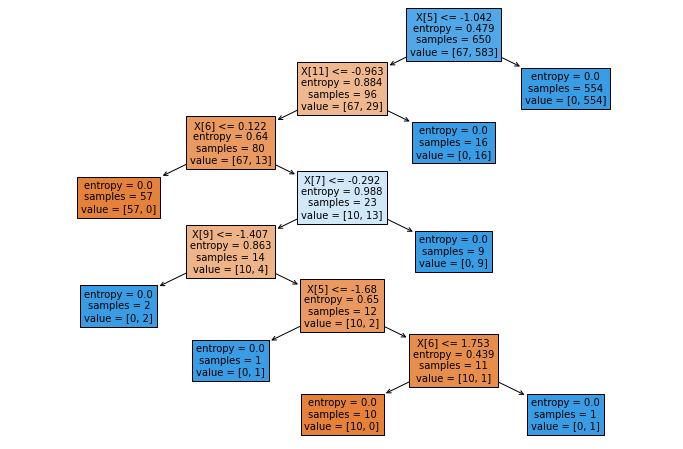

In [34]:
from sklearn import tree

pt.figure(figsize=(12,8)) 
tree.plot_tree(tree_fit, filled=True, fontsize=10)
pt.show()

# building models for deleted data

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

log = LogisticRegression(random_state=0)
log.fit(X_deleted_train, Y_deleted_train)
predict_log = log.predict(X_deleted_test)
acc_log = accuracy_score(Y_deleted_test, predict_log)*100

from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=1)
forest.fit(X_deleted_train, Y_deleted_train)
predict_forest = forest.predict(X_deleted_test)
acc_forest = accuracy_score(Y_deleted_test, predict_forest)*100

from sklearn import svm
clf = svm.SVC(kernel='linear')  # Linear Kernel
clf.fit(X_deleted_train, Y_deleted_train)
predict_svm = clf.predict(X_deleted_test)
acc_svm = accuracy_score(Y_deleted_test, predict_svm)*100

from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_deleted_train, Y_deleted_train)
predict_knn = neigh.predict(X_deleted_test)
acc_knn = accuracy_score(Y_deleted_test, predict_knn)*100

from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion='entropy', random_state=0)
tree.fit(X_deleted_train, Y_deleted_train)
predict_tree = tree.predict(X_deleted_test)
acc_tree = accuracy_score(Y_deleted_test, predict_tree)*100

from sklearn.ensemble import GradientBoostingClassifier
gbk = GradientBoostingClassifier()
gbk.fit(X_deleted_train, Y_deleted_train)
predict_gbk = gbk.predict(X_deleted_test)
acc_g = accuracy_score(Y_deleted_test , predict_gbk)*100

from sklearn.naive_bayes import GaussianNB
gaussian = GaussianNB()
gaussian.fit(X_deleted_train, Y_deleted_train)
predict_naive = gaussian.predict(X_deleted_test)
acc_naive = accuracy_score(Y_deleted_test , predict_naive)*100



In [36]:
print("For deleted data")
print('[1]Logistic Regression Training Accuracy :', acc_log)
print('[2]Decision Tree Classifier Training Accuracy :', acc_tree)
print('[3]KNN Classifier Training Accuracy :', acc_knn)
print('[4]SVM Training Accuracy :', acc_svm)
print('[5]Random Forest Classifier Training Accuracy :', acc_forest)
print('[6]Gradient Boosting Classifier Training Accuracy :', acc_g)
print('[7]naive bayes Training Accuracy :', acc_naive)

For deleted data
[1]Logistic Regression Training Accuracy : 96.74267100977198
[2]Decision Tree Classifier Training Accuracy : 98.37133550488599
[3]KNN Classifier Training Accuracy : 93.15960912052117
[4]SVM Training Accuracy : 95.76547231270358
[5]Random Forest Classifier Training Accuracy : 97.06840390879479
[6]Gradient Boosting Classifier Training Accuracy : 97.39413680781759
[7]naive bayes Training Accuracy : 93.81107491856677


# Cross Validation

In [37]:
tree = DecisionTreeClassifier(criterion='entropy', random_state=1)
log = LogisticRegression(random_state=0)
forest = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=1)
svm = svm.SVC(kernel='linear')  # Linear Kernel
neigh = KNeighborsClassifier(n_neighbors=3)
gaussian = GaussianNB()
gb = GradientBoostingClassifier()


## 1) deleted data

In [38]:
from sklearn.model_selection import cross_validate
tree_results = cross_validate(tree, X_deleted, Y_deleted)
log_results = cross_validate(log, X_deleted, Y_deleted)
forest_results = cross_validate(forest, X_deleted, Y_deleted)
svm_results = cross_validate(svm, X_deleted, Y_deleted)
knn_results = cross_validate(neigh, X_deleted, Y_deleted)
nb_results = cross_validate(gaussian, X_deleted, Y_deleted)
gb_results = cross_validate(gb, X_deleted, Y_deleted)


print("Decision tree 5-fold test score:", tree_results['test_score'][0] * 100, ",", tree_results['test_score'][1] * 100, ",", tree_results['test_score'][2] * 100, ",", tree_results['test_score'][3] * 100, ",", tree_results['test_score'][4] * 100)
print("Logistic Regression 5-fold test score:", log_results['test_score'][0] * 100, ",", log_results['test_score'][1] * 100, ",", log_results['test_score'][2] * 100, ",", log_results['test_score'][3] * 100, ",", log_results['test_score'][4] * 100)
print("Random Forest 5-fold test score:", forest_results['test_score'][0] * 100, ",", forest_results['test_score'][1] * 100, ",", forest_results['test_score'][2] * 100, ",", forest_results['test_score'][3] * 100, ",", forest_results['test_score'][4] * 100)
print("SVM 5-fold test score:", svm_results['test_score'][0] * 100, ",", svm_results['test_score'][1] * 100, ",", svm_results['test_score'][2] * 100, ",", svm_results['test_score'][3] * 100, ",", svm_results['test_score'][4] * 100)
print("KNN 5-fold test score:", knn_results['test_score'][0] * 100, ",", knn_results['test_score'][1] * 100, ",", knn_results['test_score'][2] * 100, ",", knn_results['test_score'][3] * 100, ",", knn_results['test_score'][4] * 100)
print("Naive Bayes 5-fold test score:", nb_results['test_score'][0] * 100, ",", nb_results['test_score'][1] * 100, ",", nb_results['test_score'][2] * 100, ",", nb_results['test_score'][3] * 100, ",", nb_results['test_score'][4] * 100)


Decision tree 5-fold test score: 82.38636363636364 , 98.85714285714286 , 100.0 , 98.85714285714286 , 99.42857142857143
Logistic Regression 5-fold test score: 73.86363636363636 , 96.57142857142857 , 98.85714285714286 , 94.85714285714286 , 96.57142857142857
Random Forest 5-fold test score: 61.93181818181818 , 98.85714285714286 , 100.0 , 96.57142857142857 , 98.28571428571429
SVM 5-fold test score: 73.86363636363636 , 96.0 , 98.28571428571429 , 95.42857142857143 , 95.42857142857143
KNN 5-fold test score: 69.88636363636364 , 94.85714285714286 , 96.57142857142857 , 93.14285714285714 , 89.71428571428571
Naive Bayes 5-fold test score: 60.79545454545454 , 99.42857142857143 , 100.0 , 97.14285714285714 , 95.42857142857143


## 2) normal data

In [39]:
from sklearn.model_selection import cross_validate
tree_results = cross_validate(tree, X_normal, Y_normal)
log_results = cross_validate(log, X_normal, Y_normal)
forest_results = cross_validate(forest, X_normal, Y_normal)
svm_results = cross_validate(svm, X_normal, Y_normal)
knn_results = cross_validate(neigh, X_normal, Y_normal)
nb_results = cross_validate(gaussian, X_normal, Y_normal)
gb_results = cross_validate(gb, X_normal, Y_normal)


print("Decision tree 5-fold test score:", tree_results['test_score'][0] * 100, ",", tree_results['test_score'][1] * 100, ",", tree_results['test_score'][2] * 100, ",", tree_results['test_score'][3] * 100, ",", tree_results['test_score'][4] * 100)
print("Logistic Regression 5-fold test score:", log_results['test_score'][0] * 100, ",", log_results['test_score'][1] * 100, ",", log_results['test_score'][2] * 100, ",", log_results['test_score'][3] * 100, ",", log_results['test_score'][4] * 100)
print("Random Forest 5-fold test score:", forest_results['test_score'][0] * 100, ",", forest_results['test_score'][1] * 100, ",", forest_results['test_score'][2] * 100, ",", forest_results['test_score'][3] * 100, ",", forest_results['test_score'][4] * 100)
print("SVM 5-fold test score:", svm_results['test_score'][0] * 100, ",", svm_results['test_score'][1] * 100, ",", svm_results['test_score'][2] * 100, ",", svm_results['test_score'][3] * 100, ",", svm_results['test_score'][4] * 100)
print("KNN 5-fold test score:", knn_results['test_score'][0] * 100, ",", knn_results['test_score'][1] * 100, ",", knn_results['test_score'][2] * 100, ",", knn_results['test_score'][3] * 100, ",", knn_results['test_score'][4] * 100)
print("Naive Bayes 5-fold test score:", nb_results['test_score'][0] * 100, ",", nb_results['test_score'][1] * 100, ",", nb_results['test_score'][2] * 100, ",", nb_results['test_score'][3] * 100, ",", nb_results['test_score'][4] * 100)


Decision tree 5-fold test score: 84.0 , 99.0 , 100.0 , 98.5 , 99.5
Logistic Regression 5-fold test score: 73.0 , 97.0 , 98.0 , 96.0 , 97.0
Random Forest 5-fold test score: 66.0 , 98.5 , 100.0 , 97.5 , 97.5
SVM 5-fold test score: 72.0 , 96.5 , 97.5 , 97.0 , 97.0
KNN 5-fold test score: 69.0 , 94.0 , 97.0 , 95.5 , 96.0
Naive Bayes 5-fold test score: 69.0 , 99.5 , 99.0 , 99.0 , 94.5


## 3) replaced data

In [40]:
from sklearn.model_selection import cross_validate
tree_results = cross_validate(tree, X_replaced, Y_replaced)
log_results = cross_validate(log, X_replaced, Y_replaced)
forest_results = cross_validate(forest, X_replaced, Y_replaced)
svm_results = cross_validate(svm, X_replaced, Y_replaced)
knn_results = cross_validate(neigh, X_replaced, Y_replaced)
nb_results = cross_validate(gaussian, X_replaced, Y_replaced)
gb_results = cross_validate(gb, X_replaced, Y_replaced)


print("Decision tree 5-fold test score:", tree_results['test_score'][0] * 100, ",", tree_results['test_score'][1] * 100, ",", tree_results['test_score'][2] * 100, ",", tree_results['test_score'][3] * 100, ",", tree_results['test_score'][4] * 100)
print("Logistic Regression 5-fold test score:", log_results['test_score'][0] * 100, ",", log_results['test_score'][1] * 100, ",", log_results['test_score'][2] * 100, ",", log_results['test_score'][3] * 100, ",", log_results['test_score'][4] * 100)
print("Random Forest 5-fold test score:", forest_results['test_score'][0] * 100, ",", forest_results['test_score'][1] * 100, ",", forest_results['test_score'][2] * 100, ",", forest_results['test_score'][3] * 100, ",", forest_results['test_score'][4] * 100)
print("SVM 5-fold test score:", svm_results['test_score'][0] * 100, ",", svm_results['test_score'][1] * 100, ",", svm_results['test_score'][2] * 100, ",", svm_results['test_score'][3] * 100, ",", svm_results['test_score'][4] * 100)
print("KNN 5-fold test score:", knn_results['test_score'][0] * 100, ",", knn_results['test_score'][1] * 100, ",", knn_results['test_score'][2] * 100, ",", knn_results['test_score'][3] * 100, ",", knn_results['test_score'][4] * 100)
print("Naive Bayes 5-fold test score:", nb_results['test_score'][0] * 100, ",", nb_results['test_score'][1] * 100, ",", nb_results['test_score'][2] * 100, ",", nb_results['test_score'][3] * 100, ",", nb_results['test_score'][4] * 100)


Decision tree 5-fold test score: 84.0 , 99.0 , 100.0 , 98.5 , 99.5
Logistic Regression 5-fold test score: 75.0 , 97.0 , 97.5 , 96.0 , 97.0
Random Forest 5-fold test score: 63.0 , 98.5 , 100.0 , 98.0 , 97.0
SVM 5-fold test score: 78.0 , 97.5 , 98.5 , 96.5 , 96.5
KNN 5-fold test score: 69.5 , 95.0 , 97.0 , 94.0 , 93.0
Naive Bayes 5-fold test score: 66.0 , 99.0 , 100.0 , 97.5 , 96.0


# Feature Importance 

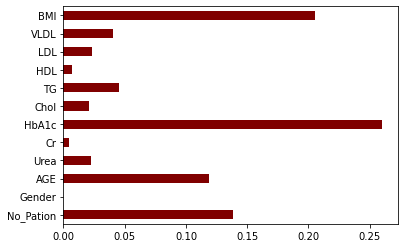

In [41]:
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt

importances = mutual_info_classif(X_deleted,Y_deleted)
feat_importances = pd.Series(importances, data_deletedRows.columns[0:len(data_deletedRows.columns)-1])
feat_importances.plot(kind = 'barh', color = 'maroon')
plt.show()